# Exercício 1

In [1]:
import pandas as pd
import numpy as np
import csv
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

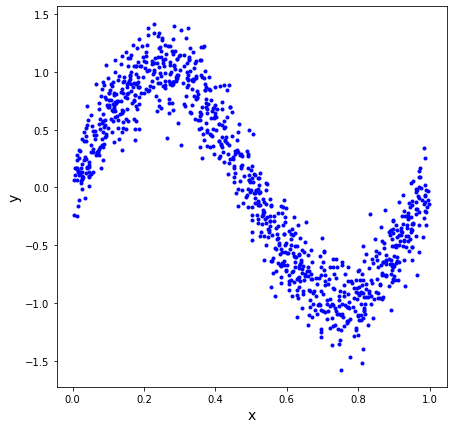

In [2]:
df = pd.read_csv('./poly_reg_p.csv', header=None)

x = df[0].to_numpy()
y = df[1].to_numpy()

X =  x.reshape(len(y), 1)
y_noisy = y.reshape(len(y), 1)

# Split the whole set into random training and validation set.
x_train, x_val, y_train, y_val = train_test_split(X, y_noisy, test_size=0.3, random_state=42)

fig = plt.figure(figsize=(7,7))
plt.plot(x, y_noisy, 'b.')
plt.xlabel('x',  fontsize=14)
plt.ylabel('y',  fontsize=14)
plt.show()

In [3]:
print('tamanho conjunto de treinamento:', len(y_train))
print('tamanho conjunto de validação:', len(y_val))

tamanho conjunto de treinamento: 700
tamanho conjunto de validação: 300


# Holdout cross-validation (70/30%)

In [4]:
starttime = timeit.default_timer()
mean_vec = []
std_vec = []

for d in range(1, 20):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    polynomial_regression.fit(x_train, y_train)
    
    y_val_predict = polynomial_regression.predict(x_val)
    
    mean_vec.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))

print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

Tempo de execução: 0.4398 [s]


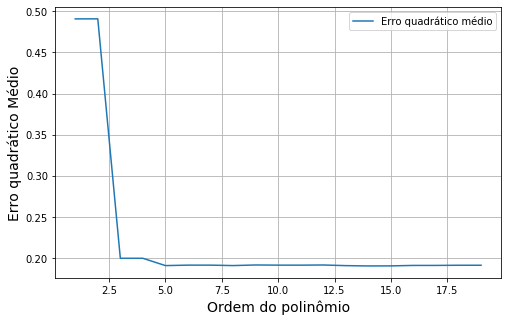

In [5]:
# Plot results.
plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro quadrático Médio', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

# k-fold cross-validation (k=10)

In [6]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Instantiate the k-Fold object.
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

mean_vec = []
std_vec = []
for d in range(1, 20):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, X, y_noisy, scoring='neg_mean_squared_error', cv=kfold)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())

print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

Tempo de execução: 0.5223 [s]


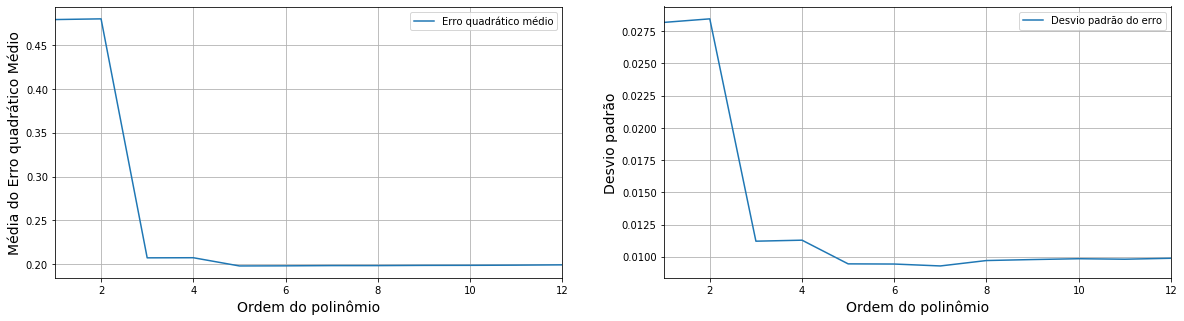

In [7]:
# Plot results.
plt.figure(figsize=(20, 5))
plt.title('AA')
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 20), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 20), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

#Show the plot.
plt.show()

# Leave-P-Out (P=1).

In [8]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

#Leave-P-Out com p=1 é igual ao LeaveOneOut
loocv = LeaveOneOut()

mean_vec = []
std_vec = []
for d in range(1, 20):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=True)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, X, y_noisy, scoring='neg_mean_squared_error', cv=loocv)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())
    
print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

Tempo de execução: 52.4268 [s]


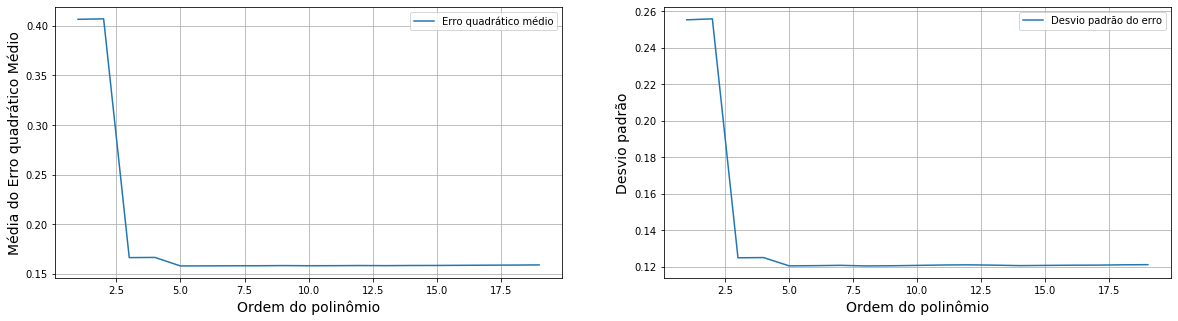

In [9]:
# Plot results.
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 20), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 20), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.legend()
plt.grid()

#Show the plot.
plt.show()

Após analizar as curvas resultantes dos métodos holdout, k-fold e leave-p-out (p=1), pode-se concluir que o melhor polinômio a ser utilizado é o de grau 5.

Todas as curvas utilizadas para esta tomada de decisão, estão disponíveis acima, no notebook.

# Treinamento do modelo com polinômio de ordem 5

In [10]:
# Instantiate a polynomial.
poly_features = PolynomialFeatures(degree=5, include_bias=True)
# Instantiate a scaler.
std_scaler = StandardScaler()
# Instantiate a linear regressor.
lin_reg = LinearRegression()

# Create a pipeline of actions.
polynomial_regression = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
])

polynomial_regression.fit(X, y_noisy)
    
y_predict = polynomial_regression.predict(X)

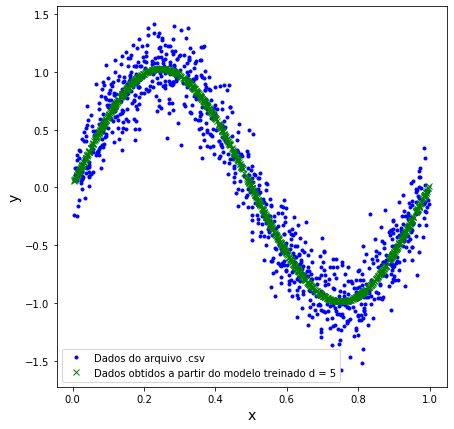

In [11]:
fig = plt.figure(figsize=(7,7))
plt.plot(x, y_noisy, 'b.', label = 'Dados do arquivo .csv')
plt.plot(x, y_predict, 'gx', label = 'Dados obtidos a partir do modelo treinado d = 5')
plt.xlabel('x',  fontsize=14)
plt.ylabel('y',  fontsize=14)
plt.legend()
plt.show()